<a href="https://colab.research.google.com/github/edilauxillea/Handwritten-Digit-Detection/blob/main/ANN_Project_on_HandWritten_Digit_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

Theano - https://pypi.org/project/Theano/

Keras - https://keras.io/

TensorFlow - https://www.tensorflow.org/

PyTorch - https://pytorch.org/

# Jamboard

Link: https://jamboard.google.com/d/1LOfgv7PuFh37QZbWd_fVqUK5x71Pwj45w8idDig2BVY/edit?usp=sharing

# Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
data = keras.datasets.mnist

In [3]:
data

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
(X_train, y_train),(X_test, y_test) = data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

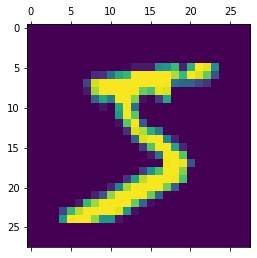

In [7]:
plt.matshow(X_train[0])

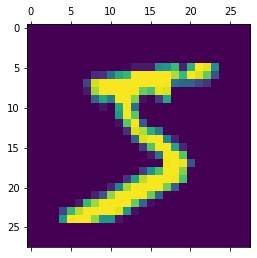

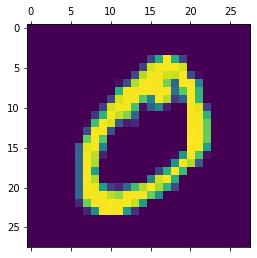

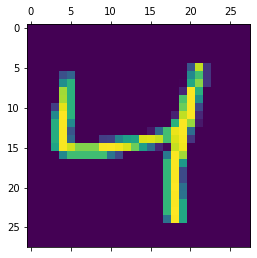

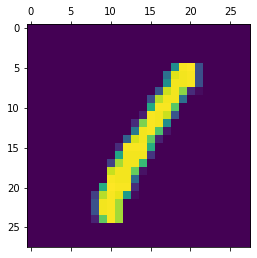

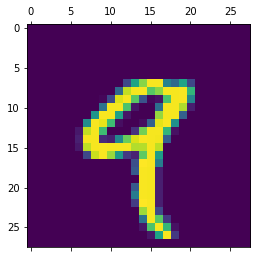

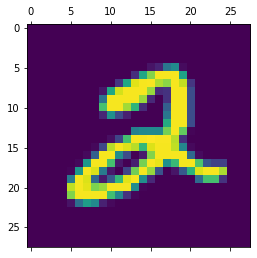

In [8]:
for i in range(6):
  plt.matshow(X_train[i])

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
X_train.ndim

3

In [11]:
X_train[500].ndim

2

In [12]:
# (5,28,28)
for i in range(5):
  print(1,28,28)

1 28 28
1 28 28
1 28 28
1 28 28
1 28 28


In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [14]:
# Flattening the X_train & X_test
flat_X_train = X_train.reshape(len(X_train),28*28)
flat_X_test = X_test.reshape(len(X_test),28*28)

In [15]:
flat_X_train.shape

(60000, 784)

In [16]:
flat_X_train[0].ndim

1

In [17]:
flat_X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [18]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

* Units (Neuron): https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc

* Activation: https://keras.io/api/layers/activations/

* Compile: https://www.tutorialspoint.com/keras/keras_model_compilation.htm

In [19]:
model = keras.Sequential([
                          keras.layers.Dense(units=10,
                                             input_shape=(784,),
                                             activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(flat_X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 10.2692 - accuracy: 0.8370
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.0579 - accuracy: 0.8781
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5886 - accuracy: 0.8835
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5038 - accuracy: 0.8856
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3651 - accuracy: 0.8870


Link: https://stackoverflow.com/questions/58352326/running-the-tensorflow-2-0-code-gives-valueerror-tf-function-decorated-functio

In [20]:
tf.config.run_functions_eagerly(True)

In [21]:
new_X_train = X_train/255
new_X_test = X_test/255

In [22]:
new_X_train[0][5]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01176471, 0.07058824, 0.07058824,
       0.07058824, 0.49411765, 0.53333333, 0.68627451, 0.10196078,
       0.65098039, 1.        , 0.96862745, 0.49803922, 0.        ,
       0.        , 0.        , 0.        ])

In [23]:
new_flat_X_train = new_X_train.reshape(len(new_X_train),28*28)
new_flat_X_test = new_X_test.reshape(len(new_X_test),28*28)

In [24]:
model = keras.Sequential([
                          keras.layers.Dense(units=10,
                                             input_shape=(784,),
                                             activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(new_flat_X_train,y_train, epochs=5)

Epoch 1/5
   1/1875 [..............................] - ETA: 1:21 - loss: 2.2977 - accuracy: 0.1250

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1875/1875 [==============================] - 21s 11ms/step - loss: 0.4695 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3039 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2834 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2667 - accuracy: 0.9252


In [25]:
model.evaluate(new_flat_X_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2664 - accuracy: 0.9258


[0.2664286494255066, 0.9258000254631042]

In [26]:
y_pred = model.predict(new_flat_X_test)

313/313 [==============================] - 1s 2ms/step


In [27]:
y_pred[0]

array([1.9896911e-02, 3.1082379e-07, 5.3864822e-02, 9.5236671e-01,
       2.3810172e-03, 1.0159985e-01, 1.3056004e-06, 9.9982625e-01,
       7.5014502e-02, 6.2169445e-01], dtype=float32)

In [28]:
np.argmax(y_pred[0])

7

In [29]:
y_pred_label = [np.argmax(i) for i in y_pred]

In [ ]:
# y_pred_label

In [30]:
# Confusion Matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_label)

Text(69.0, 0.5, 'Predicted Value')

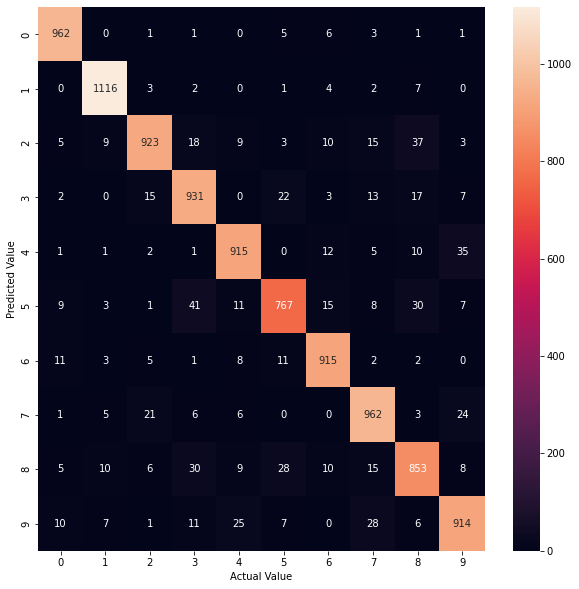

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

# Multiple Hidden Layes

In [32]:
model = keras.Sequential([
                          keras.layers.Dense(units=10,
                                             input_shape=(784,),
                                             activation='sigmoid'),
                          # Second Hidden Layer
                          keras.layers.Dense(units=100,
                                             activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(new_flat_X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 1.6633 - accuracy: 0.6640
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6704 - accuracy: 0.8766
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4562 - accuracy: 0.8955
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3804 - accuracy: 0.9049
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3434 - accuracy: 0.9113


In [33]:
model = keras.Sequential([
                          keras.layers.Dense(units=100,
                                             input_shape=(784,),
                                             activation='sigmoid'),
                          # Second Hidden Layer
                          keras.layers.Dense(units=100,
                                             activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(new_flat_X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4841 - accuracy: 0.8834
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2074 - accuracy: 0.9399
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1560 - accuracy: 0.9549
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1244 - accuracy: 0.9640
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1028 - accuracy: 0.9707


In [34]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(units=100,
                                             activation='sigmoid'),
                          # Second Hidden Layer
                          keras.layers.Dense(units=100,
                                             activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.6206 - accuracy: 0.8425
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3767 - accuracy: 0.8914
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3489 - accuracy: 0.8967
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3102 - accuracy: 0.9088
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3005 - accuracy: 0.9099


# Export the model

Pickling/Unpickling

Serialisation/De-serialisation

Dumping/Undumping